# Постройте модель для классификации FashionMNIST. Попробуйте получить качество на тестовой выборке не ниже 88%

import libraries

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import torch

import torchvision as tv
import time

params

In [21]:
BATCH_SIZE=256

load data

In [22]:
train_dataset = tv.datasets.FashionMNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.FashionMNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

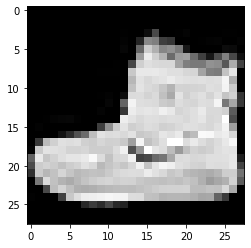

In [23]:
plt.imshow(train_dataset[0][0].numpy().reshape(28,28), cmap='gray')

Model

In [24]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 384),
    torch.nn.BatchNorm1d(384),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(384),
    torch.nn.Linear(384, 256),
    torch.nn.BatchNorm1d(256),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(256),
    torch.nn.Linear(256, 10),
    torch.nn.LogSoftmax(dim=1)
)

In [25]:
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.Adam(model.parameters(), eps=1e-08, lr=0.001)
num_epochs = 20

In [26]:
for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    
    for X, y in train:
        
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, train_loss: 0.4289362969550681, train_acc: 0.8457, test_loss: 0.38210840076208114, test_acc: 0.8644
ep: 1, train_loss: 0.3162091678761421, train_acc: 0.8832833333333333, test_loss: 0.35354749448597433, test_acc: 0.8746
ep: 2, train_loss: 0.2748858131626819, train_acc: 0.8990833333333333, test_loss: 0.3438053146004677, test_acc: 0.8755
ep: 3, train_loss: 0.2451611061679556, train_acc: 0.9097333333333333, test_loss: 0.34612213633954525, test_acc: 0.8768
ep: 4, train_loss: 0.2213530848635004, train_acc: 0.9189333333333334, test_loss: 0.3438006989657879, test_acc: 0.8799
ep: 5, train_loss: 0.20120657473168474, train_acc: 0.9255, test_loss: 0.3391278598457575, test_acc: 0.8857
ep: 6, train_loss: 0.18107448743378862, train_acc: 0.9334333333333333, test_loss: 0.34218670763075354, test_acc: 0.887
ep: 7, train_loss: 0.16388326265076372, train_acc: 0.94065, test_loss: 0.35062150517478585, test_acc: 0.8864
ep: 8, train_loss: 0.15129439684938878, train_acc: 0.9449333333333333, test_loss: 0.

эксперименты

In [27]:
model_2 = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 1568),
    torch.nn.BatchNorm1d(1568),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(1568),
    torch.nn.Linear(1568, 512),
    torch.nn.BatchNorm1d(512),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(512),
    torch.nn.Linear(512, 10),
    torch.nn.LogSoftmax(dim=1)
)

In [28]:
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.Adam(model_2.parameters(), eps=1e-08, lr=0.001)
num_epochs = 20

In [29]:
for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    
    for X, y in train:
        
        trainer.zero_grad()
        y_pred = model_2(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    for X, y in test:
        y_pred = model_2(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, train_loss: 0.4233456721965303, train_acc: 0.8448666666666667, test_loss: 0.3789800897240639, test_acc: 0.8642
ep: 1, train_loss: 0.31592407328017214, train_acc: 0.8827166666666667, test_loss: 0.3598223298788071, test_acc: 0.8719
ep: 2, train_loss: 0.2733970519076002, train_acc: 0.8982833333333333, test_loss: 0.3551431104540825, test_acc: 0.8735
ep: 3, train_loss: 0.24177077786719545, train_acc: 0.9101333333333333, test_loss: 0.3597717955708504, test_acc: 0.8753
ep: 4, train_loss: 0.21676141068022303, train_acc: 0.9196166666666666, test_loss: 0.36301939003169537, test_acc: 0.8782
ep: 5, train_loss: 0.19387590295456825, train_acc: 0.9290666666666667, test_loss: 0.35957758538424966, test_acc: 0.8819
ep: 6, train_loss: 0.1770830457514905, train_acc: 0.9342, test_loss: 0.36902467869222166, test_acc: 0.8816
ep: 7, train_loss: 0.16598668535973163, train_acc: 0.9392666666666667, test_loss: 0.378790102340281, test_acc: 0.8808
ep: 8, train_loss: 0.14725501083947243, train_acc: 0.9464, te